1. Filter Effect 
    1. Gaussian White Noise
        1. Small STD Effect
        2. Large STD Effect
    2. mu-Gaussian White Noise 
        1. mu Effect
        2. STD Effect
            1. Small STD Effect
            2. Large STD Effect

In [1]:
import numpy as np
import random

import matplotlib.pyplot as plt

%matplotlib inline

# 1 Filter effect
1. Gaussian White Noise
    1. Small STD Effect
    2. Large STD Effect
2. mu-Gaussian White Noise 
    1. mu Effect
    2. STD Effect
        1. Small STD Effect
        2. Large STD Effect

## 1.1 Gaussian White Noise
1. Small STD Effect
2. Large STD Effect

### 1.A.a Small STD Effect

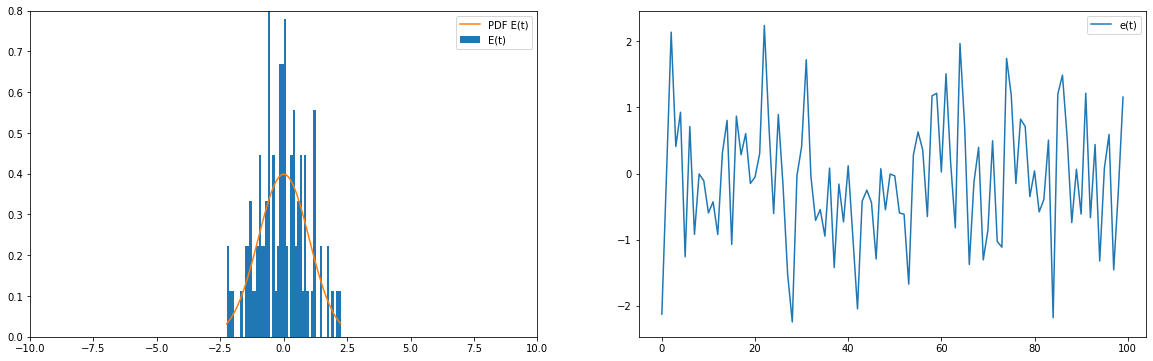

In [17]:
sample_size = 100
mean = 0.
std = 1.

vis_scale = 2



plt.figure(figsize=(20, 6))
plt.subplot(121)
e_t = np.random.normal(loc=mean, scale=std, size=(sample_size, ))
count, bins, ignored = plt.hist(e_t, sample_size//vis_scale, density=True, label='E(t)')
pdf_e_t = 1 / (std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2))

plt.plot(bins, pdf_e_t, label='PDF E(t)')
plt.xlim(-10, 10)
plt.ylim(0, 0.8)
plt.legend()

plt.subplot(122)
plt.plot(e_t, label='e(t)')
plt.legend()

plt.show()

In [26]:
weights = np.array([1.5, -0.7, 1, 0.5])
weights = np.exp(weights)/sum(np.exp(weights))
weights
np.diff(e_t, n=1)

array([ 2.12651061,  2.14357425, -1.73153188,  0.51863908, -2.18769781,
        1.97099378, -1.63218684,  0.91457096, -0.1031131 , -0.48700496,
        0.16862866, -0.4941369 ,  1.23495925,  0.49237046, -1.87879149,
        1.94232269, -0.58523588,  0.32136357, -0.75414437,  0.09509109,
        0.35657559,  1.93948776, -1.54512829, -1.30279325,  1.4981582 ,
       -1.05947622, -1.35530074, -0.72512973,  2.21563405,  0.43704683,
        1.31872891, -1.76922431, -0.6641508 ,  0.16394755, -0.40168412,
        1.02921532, -1.50457892,  1.26352803, -0.5729855 ,  0.84891754,
       -1.07570012, -1.09075914,  1.63024644,  0.1685246 , -0.18825749,
       -0.85464857,  1.36655034, -0.6203872 ,  0.54040716, -0.02798687,
       -0.56104276, -0.02114091, -1.05804654,  1.95862293,  0.34704097,
       -0.27182764, -1.00995303,  1.82806347,  0.03914296, -1.1918188 ,
        1.48590805, -1.35032685, -0.98133771,  2.79196276, -1.25350619,
       -2.09324017,  1.24604377,  0.52720722, -1.70316825,  0.45

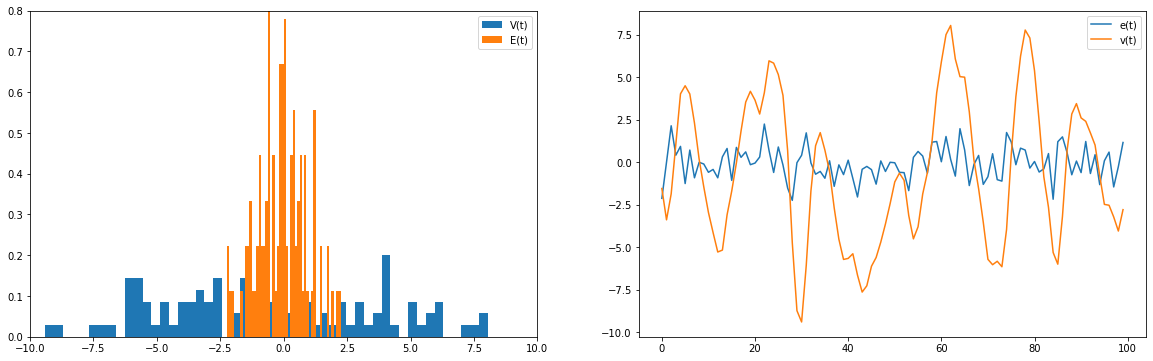

In [31]:
v_t = np.zeros((sample_size))
weights = np.array([1.5, -0.7, 1, 0.5])
# weights = np.exp(weights)/sum(np.exp(weights))
# weights = np.ones((4,))*0.1
for t in range(len(v_t)):
    v_t[t] = np.array([v_t[t-1], v_t[t-2], e_t[t], e_t[t-1]]).dot(weights.T)
    

# visualization
plt.figure(figsize=(20, 6))
plt.subplot(121)

count, bins, ignored = plt.hist(v_t, sample_size//vis_scale, density=True, label='V(t)')
count, bins, ignored = plt.hist(e_t, sample_size//vis_scale, density=True, label='E(t)')

plt.xlim(-10, 10)
plt.ylim(0, 0.8)
plt.legend()

plt.subplot(122)
plt.plot(e_t, label='e(t)')
plt.plot(v_t, label='v(t)')
plt.legend()

plt.show()

In [ ]:
# explanations

### 1.A.b Large STD Effect

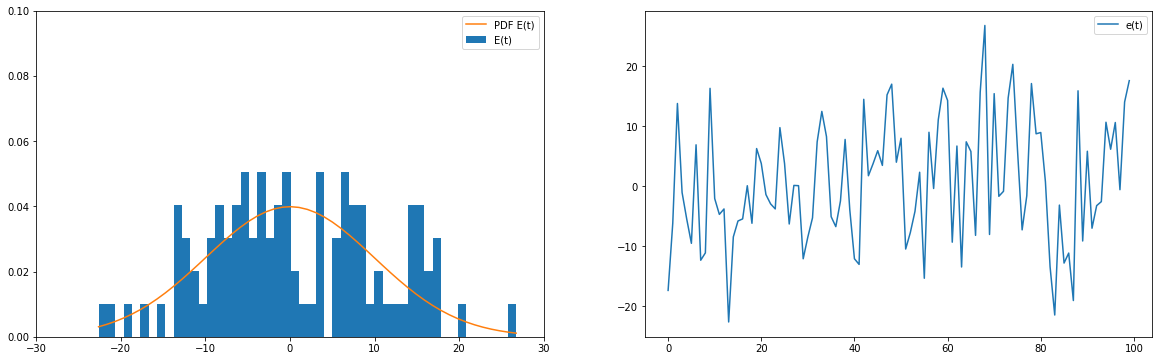

In [34]:
sample_size = 100
mean = 0.
std = 10.

vis_scale = 2



plt.figure(figsize=(20, 6))
plt.subplot(121)
e_t = np.random.normal(loc=mean, scale=std, size=(sample_size, ))
count, bins, ignored = plt.hist(e_t, sample_size//vis_scale, density=True, label='E(t)')
pdf_e_t = 1 / (std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2))

plt.plot(bins, pdf_e_t, label='PDF E(t)')
plt.xlim(-30, 30)
plt.ylim(0, 0.1)
plt.legend()

plt.subplot(122)
plt.plot(e_t, label='e(t)')
plt.legend()

plt.show()

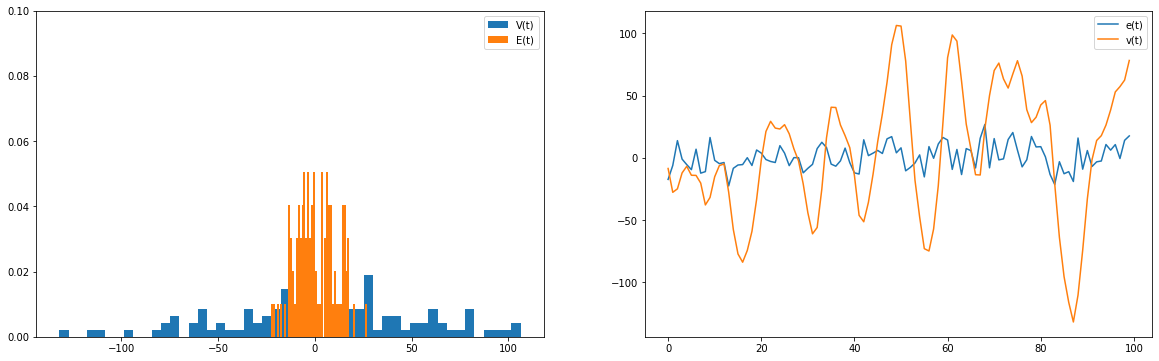

In [35]:
v_t = np.zeros((sample_size))
weights = np.array([1.5, -0.7, 1, 0.5])
# weights = np.ones((4,))*0.1
for t in range(len(v_t)):
    v_t[t] = np.array([v_t[t-1], v_t[t-2], e_t[t], e_t[t-1]]).dot(weights.T)
    

# visualization
plt.figure(figsize=(20, 6))
plt.subplot(121)
count, bins, ignored = plt.hist(v_t, sample_size//vis_scale, density=True, label='V(t)')
count, bins, ignored = plt.hist(e_t, sample_size//vis_scale, density=True, label='E(t)')

# plt.xlim(-10, 10)
plt.ylim(0, 0.1)
plt.legend()

plt.subplot(122)
plt.plot(e_t, label='e(t)')
plt.plot(v_t, label='v(t)')
plt.legend()

plt.show()

## 1.2 mu-Gaussian White Noise
1. mu Effect
2. STD Effect
    1. Small STD Effect
    2. Large STD Effect

### 1.B.a mu Effect

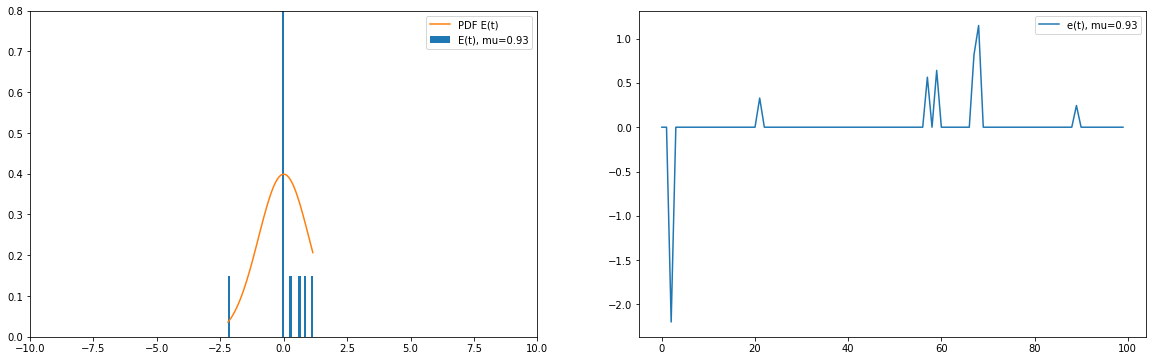

In [39]:
sample_size = 100
mean = 0.
std = 1.

vis_scale = 2

mu = np.random.random()
r = np.random.normal(loc=mean, scale=std, size=(sample_size, ))
mask = random.sample(set(np.arange(sample_size)), int(mu * sample_size))
r[mask] = 0
e_t = r

# visualization
plt.figure(figsize=(20, 6))
plt.subplot(121)
count, bins, ignored = plt.hist(e_t, sample_size//vis_scale, density=True, label='E(t), mu='+str(mu)[:4])
pdf_e_t = 1 / (std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2))

plt.plot(bins, pdf_e_t, label='PDF E(t)')
plt.xlim(-10, 10)
plt.ylim(0, 0.8)
plt.legend()

plt.subplot(122)
plt.plot(e_t, label='e(t), mu='+str(mu)[:4])
plt.legend()

plt.show()

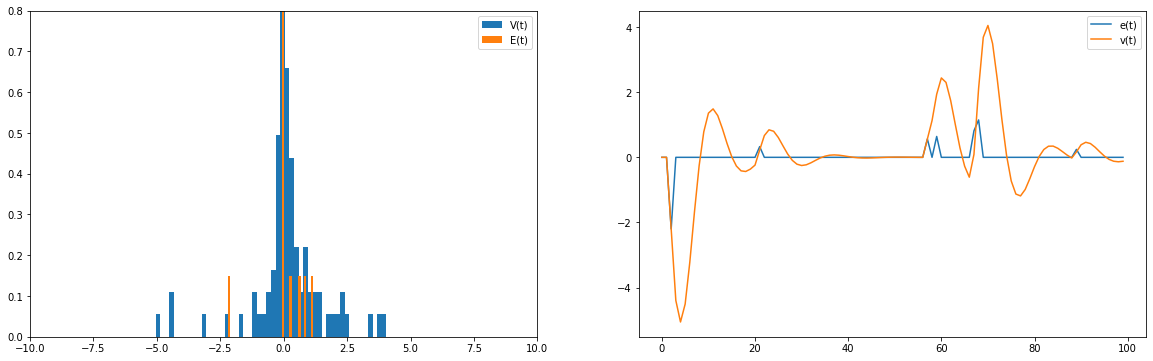

In [51]:
v_t = np.zeros((sample_size))
weights = np.array([1.5, -0.7, 1, 0.5])
# weights = np.ones((4,))*0.1
for t in range(len(v_t)):
    v_t[t] = np.array([v_t[t-1], v_t[t-2], e_t[t], e_t[t-1]]).dot(weights.T)
    

# visualization
plt.figure(figsize=(20, 6))
plt.subplot(121)
_, _, _ = plt.hist(v_t, sample_size//vis_scale, density=True, label='V(t)')
count, bins, ignored = plt.hist(e_t, sample_size//vis_scale, density=True, label='E(t)')

plt.xlim(-10, 10)
plt.ylim(0, 0.8)
plt.legend()

plt.subplot(122)
plt.plot(e_t, label='e(t)')
plt.plot(v_t, label='v(t)')
plt.legend()

plt.show()

In [ ]:
# explanation

### 1.B.b STD Effect
1. Small STD Effect
2. Large STD Effect

#### 1.B.b.i Small STD Effect

In [ ]:
# same as above

#### 1.B.b.ii Large STD Effect

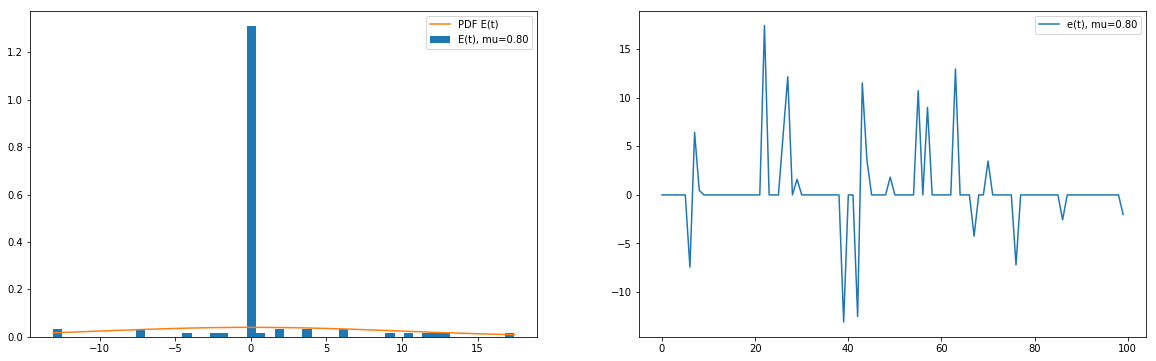

In [ ]:
sample_size = 100
mean = 0.
std = 10.

vis_scale = 2

# mu = np.random.random()  # we use same mu from small STD effect
r = np.random.normal(loc=mean, scale=std, size=(sample_size, ))
mask = random.sample(set(np.arange(sample_size)), int(mu * sample_size))
r[mask] = 0
e_t = r

# visualization
plt.figure(figsize=(20, 6))
plt.subplot(121)
count, bins, ignored = plt.hist(e_t, sample_size//vis_scale, density=True, label='E(t), mu='+str(mu)[:4])
pdf_e_t = 1 / (std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2))

plt.plot(bins, pdf_e_t, label='PDF E(t)')
# plt.xlim(-10, 10)
# plt.ylim(0, 0.8)
plt.legend()

plt.subplot(122)
plt.plot(e_t, label='e(t), mu='+str(mu)[:4])
plt.legend()

plt.show()

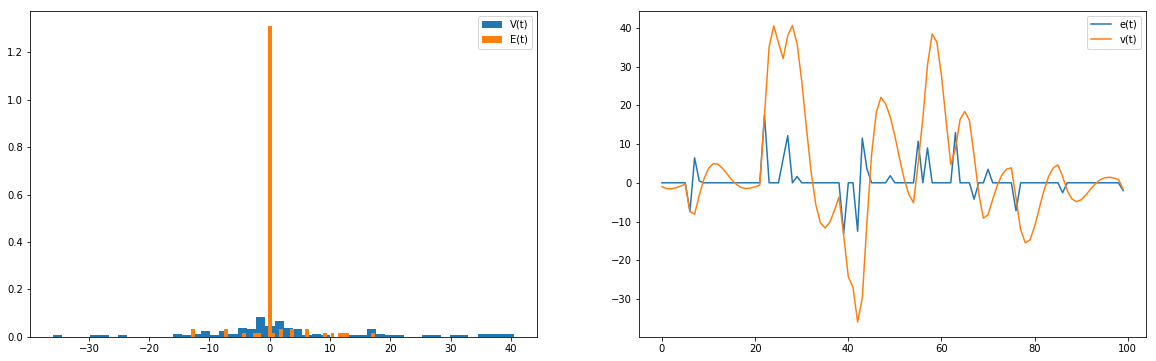

In [ ]:
v_t = np.zeros((sample_size))
weights = np.array([1.5, -0.7, 1, 0.5])

for t in range(len(v_t)):
    v_t[t] = np.array([v_t[t-1], v_t[t-2], e_t[t], e_t[t-1]]).dot(weights.T)
    

# visualization
plt.figure(figsize=(20, 6))
plt.subplot(121)
count, bins, ignored = plt.hist(v_t, sample_size//vis_scale, density=True, label='V(t)')
count, bins, ignored = plt.hist(e_t, sample_size//vis_scale, density=True, label='E(t)')

# plt.xlim(-10, 10)
# plt.ylim(0, 0.8)
plt.legend()

plt.subplot(122)
plt.plot(e_t, label='e(t)')
plt.plot(v_t, label='v(t)')
plt.legend()

plt.show()

## Stationary

In [79]:
realization_size = 1000000
v_t = np.zeros((sample_size))

mean = 0
std = 1
weights = np.array([1.5, -0.7, 1, 0.5])

v_t = np.zeros((realization_size, sample_size))

for r in range(realization_size):
    e_t = np.random.normal(loc=mean, scale=std, size=(sample_size, ))
    for t in range(sample_size):
        v_t[r, t] = np.array([v_t[r, t-1], v_t[r, t-2], e_t[t], e_t[t-1]]).dot(weights.T)
v_t.shape

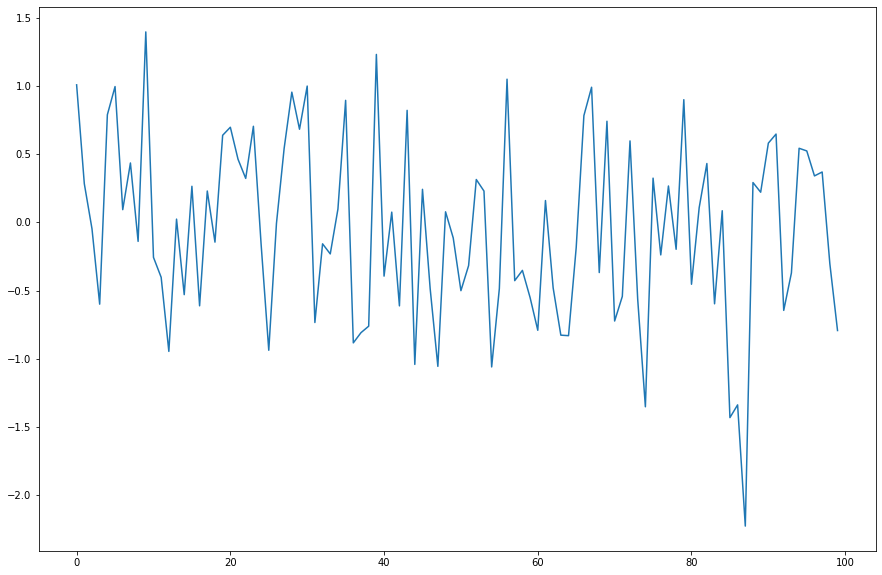

In [94]:
mean_samples = v_t.mean(axis=-1)
plt.figure(figsize=(15, 10))
plt.plot(mean_samples[random.sample(set(range(len(mean_samples))), 100)])

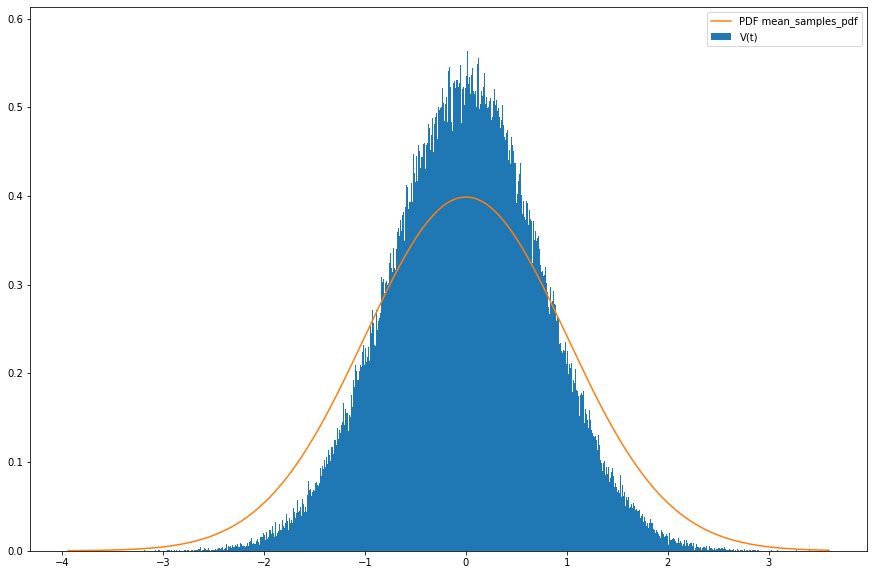

In [105]:
plt.figure(figsize=(15, 10))
count, bins, ignored = plt.hist(mean_samples, sample_size//vis_scale*100, density=True, label='V(t)')
mean_samples_pdf = 1 / (std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2))
plt.plot(bins, mean_samples_pdf, label='PDF mean_samples_pdf')
plt.legend()

In [102]:
mean_samples.mean()

-0.00028336787040539996

In [106]:
v_t.mean()

-0.0002833678704054013